## Waste management using CNN model

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
train_path = 'dataset/train'
test_path = 'dataset/test'

In [3]:
# Importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import plot_model
from glob import glob

In [7]:
# Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path + '/*'):
    for file in tqdm(glob(category + '/*')):
        img_array = cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image': x_data, 'label': y_data})

100%|██████████| 9999/9999 [00:02<00:00, 3568.51it/s]


In [5]:
data.shape

(22564, 2)

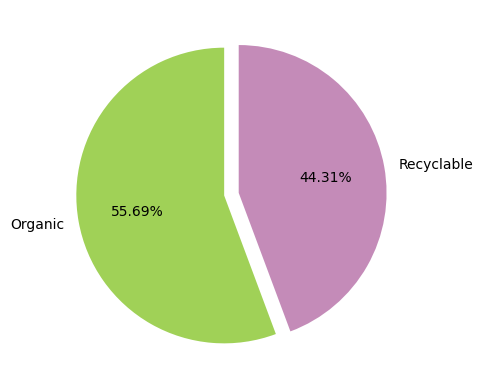

In [6]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(), labels= ['Organic','Recyclable'], autopct='%0.2f%%', colors=colors, startangle=90, explode=[0.05,0.05])
plt.show()

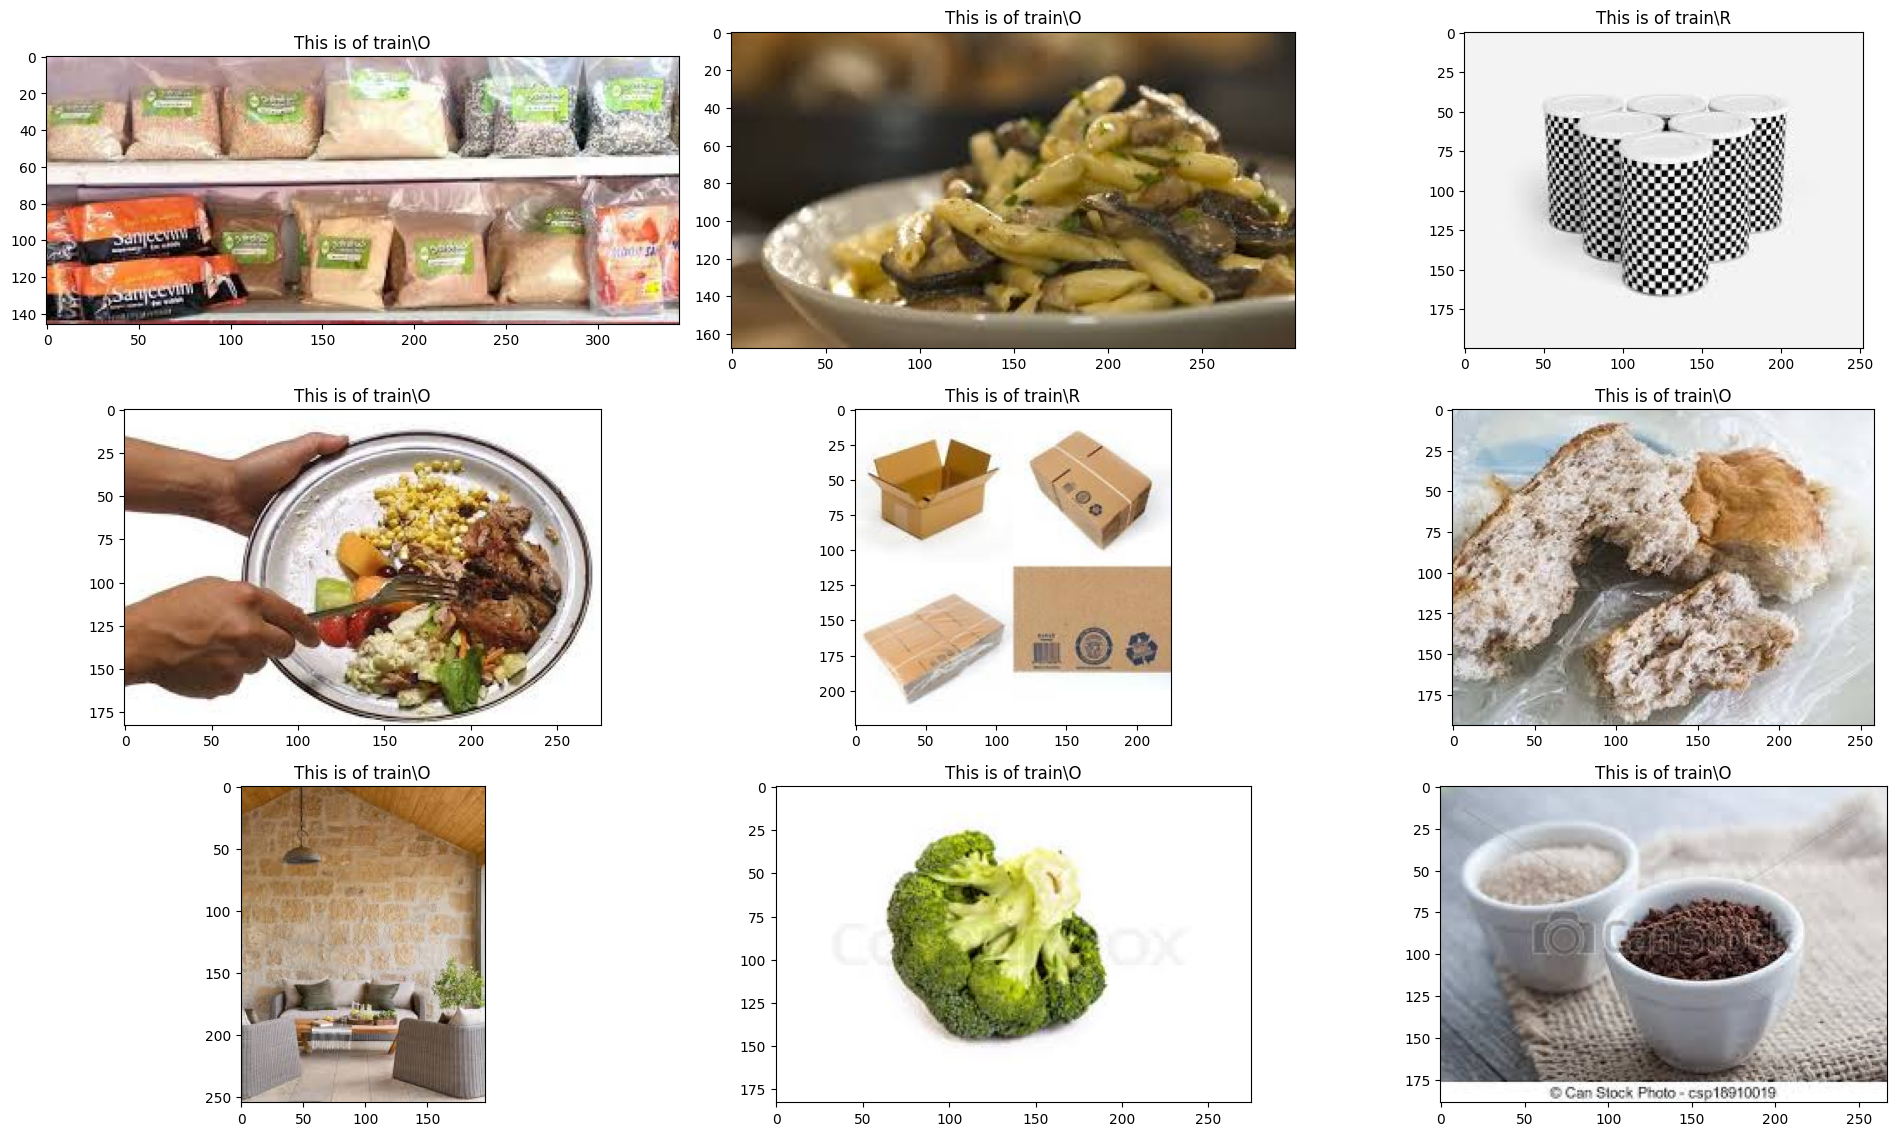

In [10]:
plt.figure(figsize = (20,15))
for i in range(9):
    plt.subplot(4, 3, (i % 12)+1)
    index = np.random.randint(15000)
    plt.title('This is of {0}'.format(data.label[index]))
    plt.imshow(data.image[index])
    plt.tight_layout()

## CNN - Convolutional Neural Network

In [14]:
model = Sequential()
# 3 convolutional layers
model.add(Conv2D(32, (3, 3), input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
# 2 dense layers
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Output layer
model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
             optimizer = "adam", 
             metrics = ["accuracy"])
batch_size = 256

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 222, 222, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 109, 109, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 52, 52, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │    22,151,424 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,261,250 (84.92 MB)

 Trainable params: 22,261,250 (84.92 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
train_datagen = ImageDataGenerator(rescale= 1./255)

In [17]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [18]:
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical',
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size = (224, 224),
    batch_size = batch_size,
    color_mode = 'rgb',
    class_mode = 'categorical',
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [19]:
hist = model.fit(
    train_generator,
    epochs = 10,
    validation_data = test_generator,
)

Epoch 1/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 550s 6s/step - accuracy: 0.6775 - loss: 0.7138 - val_accuracy: 0.8384 - val_loss: 0.3882
Epoch 2/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 2013s 23s/step - accuracy: 0.8281 - loss: 0.4227 - val_accuracy: 0.8890 - val_loss: 0.3170
Epoch 3/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 576s 6s/step - accuracy: 0.8382 - loss: 0.3888 - val_accuracy: 0.8890 - val_loss: 0.3009
Epoch 4/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 596s 7s/step - accuracy: 0.8594 - loss: 0.3558 - val_accuracy: 0.8953 - val_loss: 0.2861
Epoch 5/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 3815s 43s/step - accuracy: 0.8675 - loss: 0.3243 - val_accuracy: 0.8830 - val_loss: 0.3049
Epoch 6/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 612s 7s/step - accuracy: 0.8804 - loss: 0.3031 - val_accuracy: 0.9045 - val_loss: 0.2557
Epoch 7/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 766s 9s/step - accuracy: 0.8977 - loss: 0.2634 - val_accuracy: 0.8420 - val_loss: 0.3809
Epoch 8/10
89/89 ━━━━━━━━━━━━━━━━━━━━ 604s 7s/step - accuracy: 0.9061 - loss: 0.2435 - val_accuracy: 0.9101